## Import libraries

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt
import csv

## Data set

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O bbc-text.csv

--2020-03-24 05:34:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  24.7MB/s    in 0.2s    

2020-03-24 05:34:08 (24.7 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print("total stopwords:", len(stopwords))

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

total_sentence = len(sentences)
print("total labels:", len(labels))
print("total sentences:", total_sentence)
print("one example:", sentences[0])

total stopwords: 153
total labels: 2225
total sentences: 2225
one example: tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abidin

## Utils

In [0]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#0000FF', '#000000', '#FF0000', '#66FF66']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Dataset PCA (n_components = 2)')

    plt.show()

## Use tf-idf

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

In [6]:
print(vectorizer.get_feature_names()[2000:2200])
total_feature = len(vectorizer.get_feature_names())
print("total feature:", total_feature)
print(X.shape)
#print(X)
#print(X[0:2])
#print(X[0,89])

['agonising', 'agonisingly', 'agony', 'agoye', 'agrarian', 'agree', 'agreeable', 'agreed', 'agreeing', 'agreement', 'agreements', 'agrees', 'agricultural', 'agriculture', 'agrochemical', 'agroflora', 'aguas', 'aguilera', 'agustin', 'agyemang', 'ah', 'ahead', 'ahern', 'ahhhh', 'ahmed', 'ahold', 'ai', 'aichi', 'aid', 'aidan', 'aide', 'aided', 'aiden', 'aides', 'aiding', 'aids', 'aig', 'ailing', 'ailis', 'aim', 'aimed', 'aiming', 'aimlessly', 'aims', 'ain', 'ainsworth', 'ainum', 'aiport', 'air', 'airasia', 'airbrushes', 'airbus', 'aircraft', 'aired', 'aires', 'airing', 'airline', 'airliner', 'airliners', 'airlines', 'airplane', 'airplanes', 'airplay', 'airport', 'airports', 'airs', 'airtime', 'airway', 'airways', 'airy', 'aishwariya', 'aishwarya', 'aisle', 'aitken', 'aiyar', 'aiyegbeni', 'aizlewood', 'aj', 'ajar', 'ajax', 'ak', 'aka', 'akaev', 'akamai', 'akhmetov', 'akin', 'akira', 'akon', 'akroyd', 'aksoy', 'al', 'alabama', 'aladdin', 'alain', 'alamos', 'alan', 'alarm', 'alarmed', 'alarm

## Clustering by KMeans

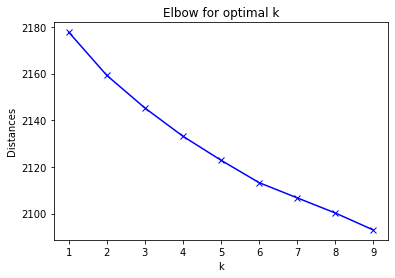

In [0]:
# check for best number of clusters
Distances = []
K = range(1,10)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X)
  Distances.append(km.inertia_)

plt.plot(K, Distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distances')
plt.title('Elbow for optimal k')
plt.show()

In [0]:
cluster = 5
model = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=5) #n_init=1
history = model.fit(X)

In [37]:
#print(model.labels_[:10])
print(history.labels_[:10])
print(np.array(labels)[:10])

[0 4 2 2 1 3 3 2 2 1]
['tech' 'business' 'sport' 'sport' 'entertainment' 'politics' 'politics'
 'sport' 'sport' 'entertainment']


## Transform X into X_list for PCA use

In [0]:
X_list = X.toarray()

In [8]:
print(X_list)
print(X_list[0])

[[0.         0.01983868 0.         ... 0.         0.         0.        ]
 [0.         0.02384706 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02591978 0.         ... 0.         0.         0.        ]
 [0.         0.01587905 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0.         0.01983868 0.         ... 0.         0.         0.        ]


## Plot 2-D diagram by PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_list)

X_pca = pca.transform(X_list)

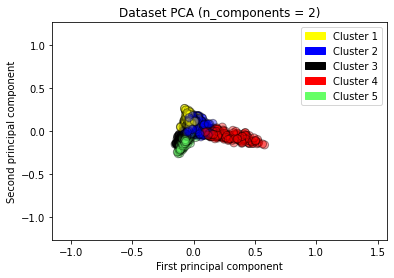

In [0]:
plot_labelled_scatter(X_pca, model.labels_, ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5'])

## Plot 2-D diagram by t-SNE

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_list)

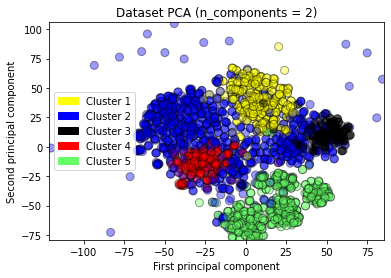

In [0]:
plot_labelled_scatter(X_tsne, model.labels_, ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5'])

## Check keywords in each cluster

In [0]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [12]:
for i in range(cluster):
  print(f"Cluster {i}:")
  for ind in order_centroids[i, :10]:
    print(f"    {terms[ind]}")

Cluster 0:
    film
    best
    awards
    award
    band
    festival
    actor
    films
    album
    oscar
Cluster 1:
    mr
    labour
    election
    blair
    party
    said
    brown
    howard
    government
    tax
Cluster 2:
    mobile
    people
    said
    users
    music
    technology
    digital
    software
    phone
    net
Cluster 3:
    said
    mr
    year
    government
    growth
    economy
    bank
    company
    market
    sales
Cluster 4:
    game
    england
    said
    win
    cup
    match
    team
    players
    world
    play


## Test the model

In [0]:
test = vectorizer.transform(["tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr)."])
print(test.shape)
predicted = model.predict(test)
print(predicted)

(1, 29123)
[0]


## Cosine similarity of tf-idf

In [0]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x, 2) * np.linalg.norm(y, 2)) 

In [38]:
print(X_list.shape)
print(X_list[0])
print(history.labels_[:10])

(2225, 29123)
[0.         0.01983868 0.         ... 0.         0.         0.        ]
[0 4 2 2 1 3 3 2 2 1]


In [39]:
print(cosine_similarity(X_list[1], X_list[1]))
print(cosine_similarity(X_list[0], X_list[1]))
print(cosine_similarity(X_list[2], X_list[5]))
print(cosine_similarity(X_list[2], X_list[3])) # both 4
print(cosine_similarity(X_list[5], X_list[6])) # both 3
print(cosine_similarity(X_list[7], X_list[8])) # both 4

1.0
0.01649351834789162
0.023339138149246142
0.050406502980031916
0.1247073245439516
0.017104164959582557


In [40]:
print(cosine_similarity(X_list[2], X_list[1593]))
print(cosine_similarity(X_list[2], X_list[1909]))

0.36768567188705487
0.2184913344623519


## Nearest Neighbors

In [0]:
from sklearn.neighbors import NearestNeighbors

In [44]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [45]:
print(neigh.kneighbors([X_list[2]],3, return_distance=True))

(array([[0.        , 1.12455709, 1.25020692]]), array([[   2, 1593, 1909]]))


In [49]:
print(history.labels_[2])
print(sentences[2])

2
tigers wary farrell  gamble  leicester say will not rushed making bid andy farrell great britain rugby league captain decide switch codes.   anybody else involved process still way away going next stage   tigers boss john wells told bbc radio leicester.  moment  still lot unknowns andy farrell  not least medical situation.  whoever take going take big  big gamble.  farrell  persistent knee problems  operation knee five weeks ago expected another three months. leicester saracens believed head list rugby union clubs interested signing farrell decides move 15-man game.  move across union  wells believes better off playing backs  least initially.  m sure make step league union involved centre   said wells.  think england prefer progress position back row can make use rugby league skills within forwards.  jury whether can cross divide.  club  balance will struck cost gamble option bringing ready-made replacement.


In [50]:
print(history.labels_[1593])
print(sentences[1593])

2
farrell saga drag - lindsay wigan chairman maurice lindsay says not expect quick solution on-going saga captain andy farrell s possible switch rugby union.  leicester saracens leading chase player  lindsay told bbc not yet done deal.  well rugby football union  league  individual club england coaching team say  s not quick decision   said.  s given us 12 years service wants go  d support him.  prospect farrell switching codes main talking point super league season far.  came bolt blue us   admitted lindsay.  s loyal friend club  s no question s deserting us. just fancies challenge.   although move lucrative one farrell wigan  lindsay said money not motivating factor club.  money side things hasn t concluded  s not point wigan   told radio five live.  shortage money never problem us.  even  salary cap can t spend penny anyway - d rather player.   lindsay also said understood rugby union interested signing farrell.  d great loss us great boost   said warriors chief.  guy absolute sport

In [51]:
print(history.labels_[1909])
print(sentences[1909])

2
sculthorpe wants lions captaincy paul sculthorpe admitted love succeed andy farrell great britain skipper wigan star switch codes rugby union.  sculthorpe vice-captain tri-nations  took st helens captaincy chris joynt last year.  definitely want job - make no bones   sculthorpe told bbc sport.  s something ve always wanted do. d gladly take it offered me.   27-year-old  captained st helens challenge cup success last year  said following footsteps farrell challenge.  andy hard act follow s something m confident   said.  gb team isn t one-man team. lot good young players pushing places anyway.   sculthorpe said rugby league world understand farrell decide move rugby union.  s short career make can   said sculthorpe.  nobody can blame go - s done everything game rugby league.   financially set life. fancies new challenge  fault   sculthorpe also called rugby league authorities serious look number games top players asked play. sean long  sculthorpe s saints lions team-mate  expressed dou